# Visualization of filters and feature maps of a Convolutional Neural Network

In [1]:
# import libraries
from keras.applications.resnet_v2 import ResNet50V2
from matplotlib import pyplot
from keras.applications.resnet_v2 import preprocess_input
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
from keras.models import Model
from matplotlib.pyplot import figure
from numpy import expand_dims

## Pre-fit ResNet50V2 Model

In [2]:
# load the model (ResNet50V2)
model = ResNet50V2()

# summarize the model
model.summary()

Model: "resnet50v2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                         

## Visualization of Convolutional Filters

In [3]:
# summarize filters in each convolutional layer (shape of the filters in each layer)

# summarize filter shapes
for layer in model.layers:

 # check for convolutional layer
	if '_conv' not in layer.name:
		continue

	# get filter weights
	filters = layer.get_weights()
	print(layer.name, filters[0].shape)

conv1_conv (7, 7, 3, 64)
conv2_block1_1_conv (1, 1, 64, 64)
conv2_block1_2_conv (3, 3, 64, 64)
conv2_block1_0_conv (1, 1, 64, 256)
conv2_block1_3_conv (1, 1, 64, 256)
conv2_block2_1_conv (1, 1, 256, 64)
conv2_block2_2_conv (3, 3, 64, 64)
conv2_block2_3_conv (1, 1, 64, 256)
conv2_block3_1_conv (1, 1, 256, 64)
conv2_block3_2_conv (3, 3, 64, 64)
conv2_block3_3_conv (1, 1, 64, 256)
conv3_block1_1_conv (1, 1, 256, 128)
conv3_block1_2_conv (3, 3, 128, 128)
conv3_block1_0_conv (1, 1, 256, 512)
conv3_block1_3_conv (1, 1, 128, 512)
conv3_block2_1_conv (1, 1, 512, 128)
conv3_block2_2_conv (3, 3, 128, 128)
conv3_block2_3_conv (1, 1, 128, 512)
conv3_block3_1_conv (1, 1, 512, 128)
conv3_block3_2_conv (3, 3, 128, 128)
conv3_block3_3_conv (1, 1, 128, 512)
conv3_block4_1_conv (1, 1, 512, 128)
conv3_block4_2_conv (3, 3, 128, 128)
conv3_block4_3_conv (1, 1, 128, 512)
conv4_block1_1_conv (1, 1, 512, 256)
conv4_block1_2_conv (3, 3, 256, 256)
conv4_block1_0_conv (1, 1, 512, 1024)
conv4_block1_3_conv (1, 1,

We can see that the first convolution layer uses a 7 x 7 filter, and others use 3 x 3 filters.

Some convolution layers use 1 x 1 filters as a bottleneck (which reduces the number of parameters and matrix multiplications).

In [4]:
# retrieve weights from the second hidden layer
filters = model.layers[2].get_weights()[0]
filters.shape

(7, 7, 3, 64)

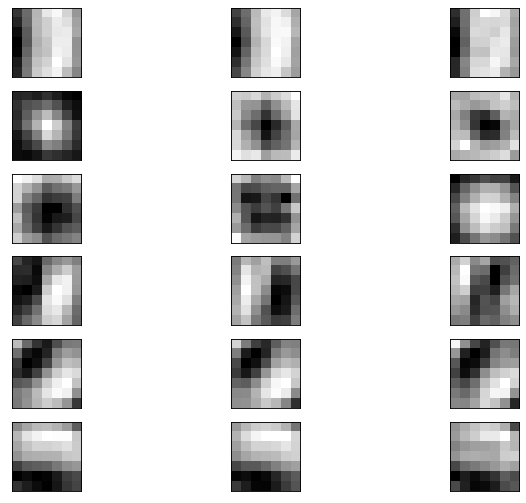

In [5]:
# normalize filter values to 0-1 so we can visualize them
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)

# plot first few filters
n_filters, ix = 6, 1

# determine the size and dpi of the displayed image
figure(figsize=(10, 8), dpi=80)

for i in range(n_filters):

	# get the filter
	f = filters[:, :, :, i]

	# plot each channel separately
	for j in range(3):

		# specify subplot and turn of axis
		ax = pyplot.subplot(n_filters, 3, ix)
		ax.set_xticks([])
		ax.set_yticks([])
	
		# plot filter channel in grayscale
		pyplot.imshow(f[:, :, j], cmap='gray')
		ix += 1

# show the figure
pyplot.show()

We have displayed only the first 6 filters. One row for each filter and one column for each channel.

The dark squares indicate small or inhibitory weights and the light squares represent large or excitatory weights.

**The intuition of some filters is reported below (row-column):**

- (1-1, 1-2, 1-3): We can see that the filters on the first row detect a gradient from light in the right to dark in the left.

- (2-1, 3-3): We see that the filters detect a gradient from light in the center to dark in the corners.

- (2-2, 2-3, 3-1): We can see that the filters detect a gradient from dark in the center to light in the corners.

- (4-1, 5-1, 5-2, 5-3): The filters detect a gradient from dark in the top left to light in the bottom right.

- (4-2): The filters detect a gradient from light in the top left to dark in the bottom right.

- (6-1, 6-2, 6-3): The filters detect a gradient from dark in the bottom to light in the top.

In [6]:
# summarize feature map size for each conv layer

# summarize feature map shapes
for i in range(len(model.layers)):
	layer = model.layers[i]

	# check for convolutional layer
	if '_conv' not in layer.name or layer.get_weights()[0].shape[0]==1:
		continue
    
	# summarize output shape
	print(i, layer.name, layer.output.shape)

2 conv1_conv (None, 112, 112, 64)
11 conv2_block1_2_conv (None, 56, 56, 64)
23 conv2_block2_2_conv (None, 56, 56, 64)
34 conv2_block3_2_conv (None, 28, 28, 64)
46 conv3_block1_2_conv (None, 28, 28, 128)
58 conv3_block2_2_conv (None, 28, 28, 128)
69 conv3_block3_2_conv (None, 28, 28, 128)
80 conv3_block4_2_conv (None, 14, 14, 128)
92 conv4_block1_2_conv (None, 14, 14, 256)
104 conv4_block2_2_conv (None, 14, 14, 256)
115 conv4_block3_2_conv (None, 14, 14, 256)
126 conv4_block4_2_conv (None, 14, 14, 256)
137 conv4_block5_2_conv (None, 14, 14, 256)
148 conv4_block6_2_conv (None, 7, 7, 256)
160 conv5_block1_2_conv (None, 7, 7, 512)
172 conv5_block2_2_conv (None, 7, 7, 512)
183 conv5_block3_2_conv (None, 7, 7, 512)


We see the same output shapes as we saw in the model summary, but in this case only for the convolutional layers (7\*7 and 3*3 Filters).

Note: We did not consider filters with size 1*1.

## Visualization of Feature Maps

**Now we want to visualize the feature map of the first conv layer.**

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)       0         
                                                                 
 conv1_conv (Conv2D)         (None, 112, 112, 64)      9472      
                                                                 
Total params: 9,472
Trainable params: 9,472
Non-trainable params: 0
_________________________________________________________________
1/1 [==============================] - 0s 149ms/step


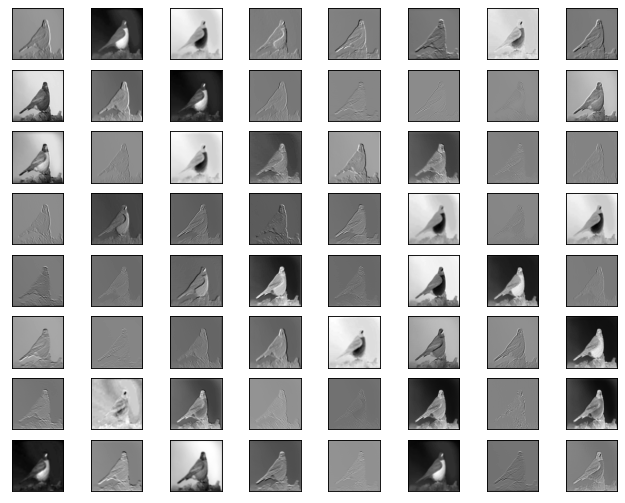

In [7]:
# plot feature map of first conv layer for given image

# determine the size and dpi of the displayed image
figure(figsize=(10, 8), dpi=80)

# redefine model to output right after the first hidden layer
model = Model(inputs=model.inputs, outputs=model.layers[2].output)
model.summary()

# load the image with the required shape
img = load_img('./img/bird.jpg', target_size=(224, 224))

# convert the image to an array
img = img_to_array(img)

# expand dimensions so that it represents a single 'sample'
img = expand_dims(img, axis=0)

# prepare the image (e.g. scale pixel values for the resnet)
img = preprocess_input(img)

# get feature map for first hidden layer
feature_maps = model.predict(img)

# plot all 64 maps in an 8x8 squares
square = 8
ix = 1
for _ in range(square):
	for _ in range(square):
   
		# specify subplot and turn of axis
		ax = pyplot.subplot(square, square, ix)
		ax.set_xticks([])
		ax.set_yticks([])
  
		# plot filter channel in grayscale
		pyplot.imshow(feature_maps[0, :, :, ix-1], cmap='gray')
		ix += 1

# show the figure
pyplot.show()

We can see that the result of applying the filters in the first convolutional layer is a lot of versions of the bird image with different features highlighted.

Some filters have separated the edges of the image. Some filters distinguish the horizontal edges and others the vertical edges of the image.

For example, some highlight lines, other focus on the background or the foreground.

**Now we want to visualize the feature maps output of each conv block.**

> The layer indexes of the last convolutional layer in each block are [2, 34, 80, 148, 183].

1/1 [==============================] - 2s 2s/step


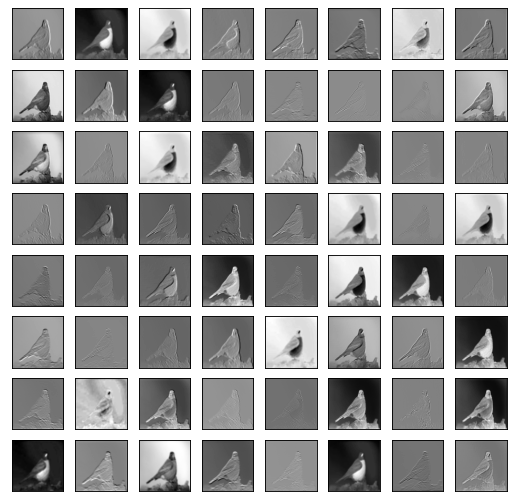


Layer 1: (1, 112, 112, 64)
*******************************************************************



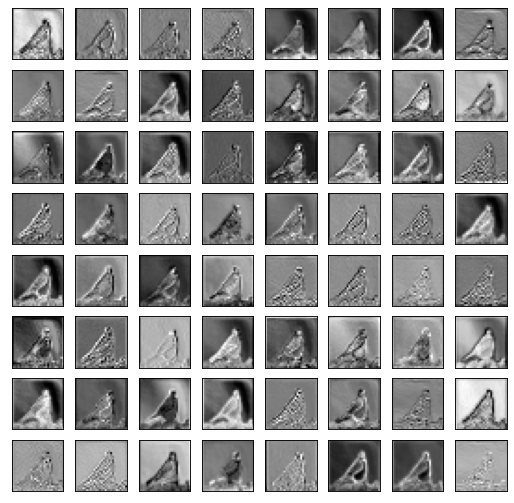


Layer 2: (1, 28, 28, 64)
*******************************************************************



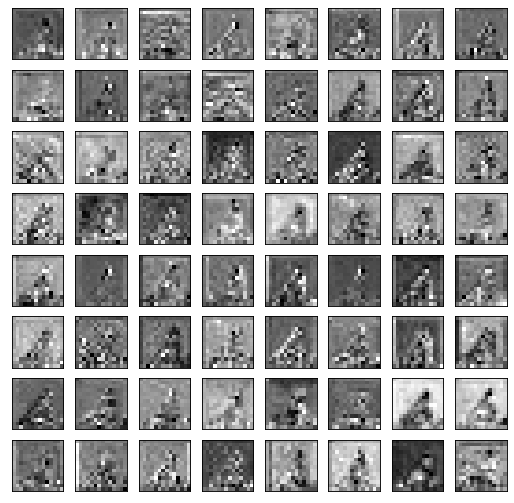


Layer 3: (1, 14, 14, 128)
*******************************************************************



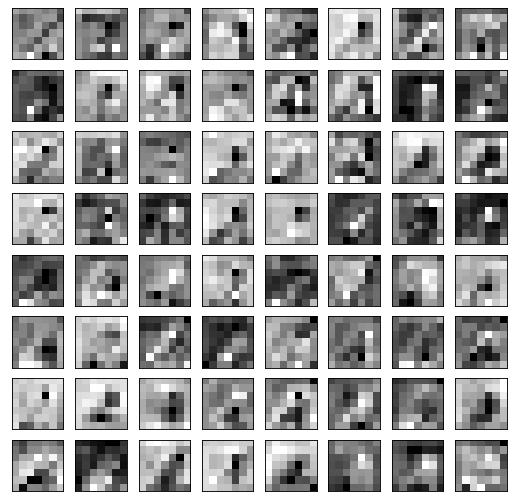


Layer 4: (1, 7, 7, 256)
*******************************************************************



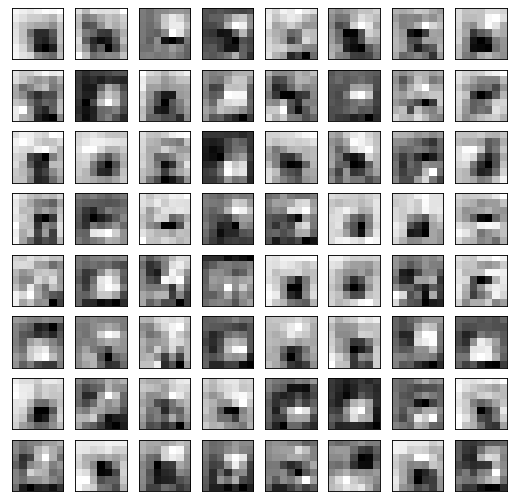


Layer 5: (1, 7, 7, 512)
*******************************************************************



In [8]:
# visualize feature maps output from each block in the resnet model

# load the model
model = ResNet50V2()

# redefine model to output right after the first hidden layer
ixs = [2, 34, 80, 148, 183]
outputs = [model.layers[i].output for i in ixs]
model = Model(inputs=model.inputs, outputs=outputs)

# load the image with the required shape
img = load_img('./img/bird.jpg', target_size=(224, 224))

# convert the image to an array
img = img_to_array(img)

# expand dimensions so that it represents a single 'sample'
img = expand_dims(img, axis=0)

# prepare the image (e.g. scale pixel values for the resnet)
img = preprocess_input(img)

# get feature map for first hidden layer
feature_maps = model.predict(img)

# plot the output from each block
square = 8
jj = 1

for fmap in feature_maps:

  figure(figsize=(8, 8), dpi=80)

	# plot all 64 maps in an 8x8 squares
  ix = 1
  for _ in range(square):
    for _ in range(square):
    
      # specify subplot and turn of axis
      ax = pyplot.subplot(square, square, ix)
      ax.set_xticks([])
      ax.set_yticks([])
    
      # plot filter channel in grayscale
      pyplot.imshow(fmap[0, :, :, ix-1], cmap='gray')
      ix += 1

  # show the figure
  pyplot.show()
  print(f"\nLayer {jj}: {fmap.shape}\n", "*" * 70)
  jj = jj + 1


We know that the number of feature maps (e.g. depth or number of channels) in deeper layers is much more than 64, such as 256 or 512. Nevertheless, we can cap the number of feature maps visualized at 64 for consistency.

The output of 64 convolutional filters for 5 layers is shown.

**We can see that the feature maps closer to the input of the model capture a lot of fine detail in the image and that as we progress deeper into the model, the feature maps show less and less detail.**

This pattern was to be expected, as the model abstracts the features from the image into more general concepts that can be used to make a classification.

Although it is not clear from the final image that the model saw a bird, we generally lose the ability to interpret these deeper feature maps but some of the filter outputs are clearly focused on the bird part.